# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Understanding Data

### Importing libraries

In [66]:
# Start coding here...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline

#### import dataset

In [67]:
path = 'recipe_site_traffic_2212.csv'
df = pd.read_csv(path, index_col='recipe')
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NaN


**Now, let's check data information.**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


**Exploring Categorical Features**

In [69]:
for col in df.columns:
    if df[col].nunique() < 20:
        print(col)
        print(df[col].unique())
        print()
        print(df[col].value_counts(dropna=False))
        print("-"*100)

category
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
----------------------------------------------------------------------------------------------------
servings
['6' '4' '1' '2' '4 as a snack' '6 as a snack']

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64
----------------------------------------------------------------------------------------------------
high_traffic
['High' nan]

High    574
NaN     373
Name: high_traffic, dtype: int64
------------------------------------------------------------------------------------------------

# Data Validation

**According to Data Information at Docs**, 

'servings' feature is Numeric, number of servings for the recipe, So we should handle it.

convert ['4 as a snack', '6 as a snack'] to [4, 6]

In [70]:
df['servings'] = df['servings'].replace({'4 as a snack':'4', '6 as a snack':'6'})
print('servings')
print(df['servings'].unique())

servings
['6' '4' '1' '2']


Checking numbers of NULLs per column

In [71]:
df.isna().sum().sort_values(ascending=False)

high_traffic    373
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
dtype: int64

We notice that there is 4-columns is 52

Do these columns share the same rows that are equal to null?

In [72]:
df[df['sugar'].isna()]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
24,NaN,NaN,NaN,NaN,Meat,2,NaN
49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
83,NaN,NaN,NaN,NaN,Meat,4,High
90,NaN,NaN,NaN,NaN,Pork,6,High
117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
122,NaN,NaN,NaN,NaN,Dessert,2,High
137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
150,NaN,NaN,NaN,NaN,Potato,2,High


Of course, so lets deal with it with replace it with mean of every column


And for "high_traffic", we replaced null with "Low" because these rows are not missing

In [73]:
cols_to_replace = ['calories', 'carbohydrate', 'sugar', 'protein']

for col in cols_to_replace:
    df[col] = df[col].replace({np.nan: df[col].mean()})

df['high_traffic'] = df['high_traffic'].replace({np.nan: 'Low'})

df.isna().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

All Done, we cleaned data.

# Exploratory Analysis

**Summary Statistics**

In [74]:
df.describe()

,calories,carbohydrate,sugar,protein
count,947.000000,947.000000,947.000000,947.000000
mean,435.939196,35.069676,9.046547,24.149296
std,440.394131,42.724059,14.270029,35.356020
min,0.140000,0.030000,0.010000,0.000000
25%,114.410000,9.135000,1.795000,3.465000
50%,313.530000,23.170000,5.050000,12.120000
75%,576.225000,42.590000,9.285000,28.530000
max,3633.160000,530.420000,148.750000,363.360000


In [75]:
df.describe(include='object')

,category,servings,high_traffic
count,947,947,947
unique,11,4,2
top,Breakfast,4,High
freq,106,391,574


### 1. Demonstrate the characteristics of data

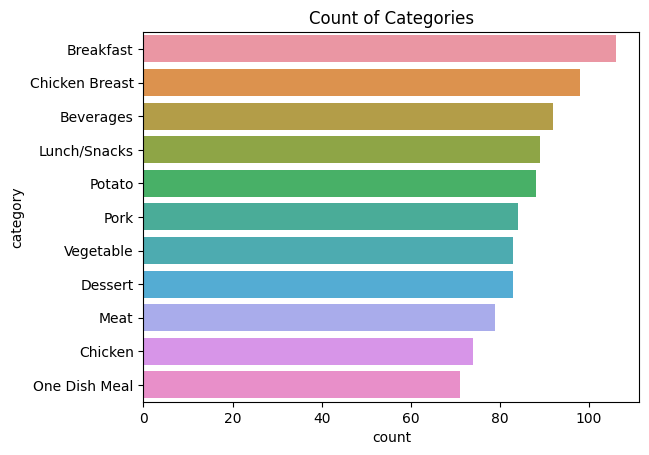

In [76]:
sns.countplot(data=df, y='category', order=df['category'].value_counts().sort_values(ascending=False).keys())
plt.title('Count of Categories')
plt.show()

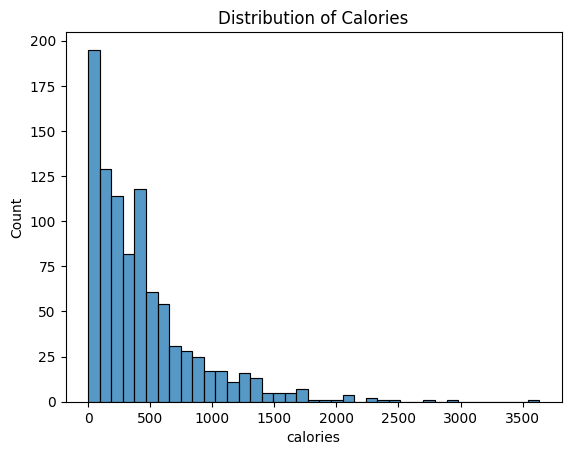

In [77]:
sns.histplot(data=df,x='calories')
plt.title('Distribution of Calories')
plt.show()

**Exploring Servings column**

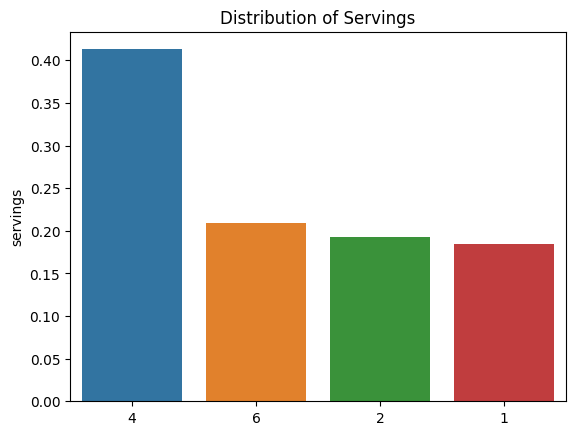

In [78]:
sns.barplot(x=df.servings.value_counts().index, y=df.servings.value_counts(normalize=True))
plt.title('Distribution of Servings')
plt.show()

### 2. Represent the relationship between features and high_traffic

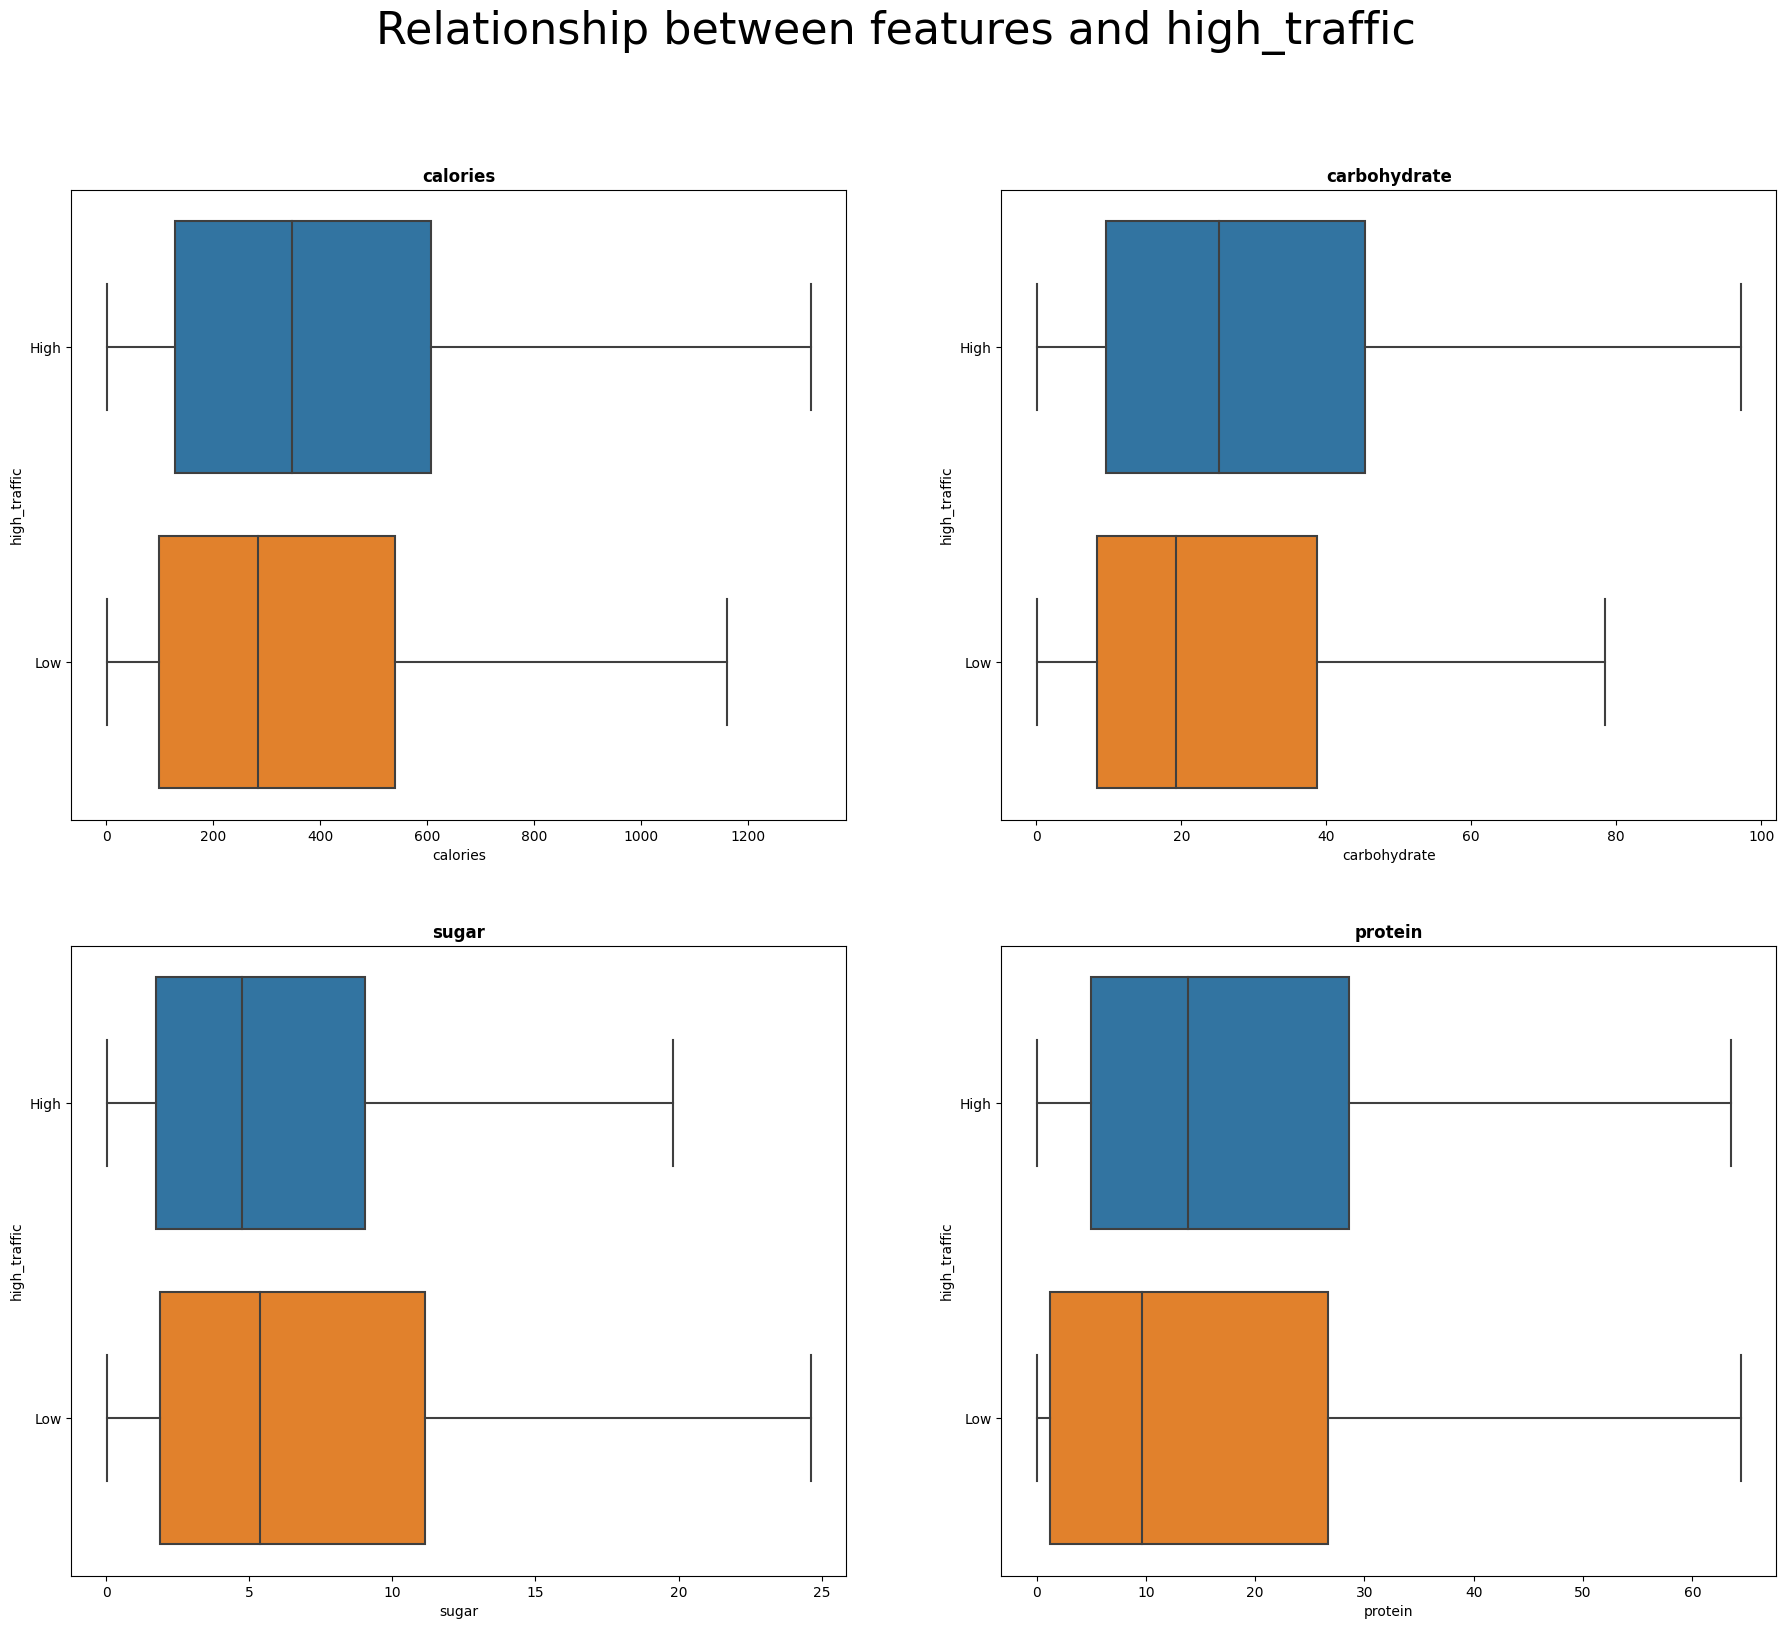

In [79]:
def plot_box(df, ax, col_name, target='high_traffic'):
    ax.set_title(col_name,fontweight ="bold")
    sns.boxplot(ax=ax,data=df,x=col_name, y=target, showfliers=0)

fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(2,2)


ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
axes = [ax1,ax2,ax3,ax4]


for ax, col_name in zip(axes, cols_to_replace):
    plot_box(df, ax, col_name)

fig.suptitle('Relationship between features and high_traffic',fontsize=32)
plt.show()


**We can summarize that**
- The more calories the recipe, the more traffic
- The more carbohydrate the recipe, the more traffic
- The less sugar the recipe, the more traffic
- The more protein the recipe, the more traffic

### Relation between calories and high_traffic

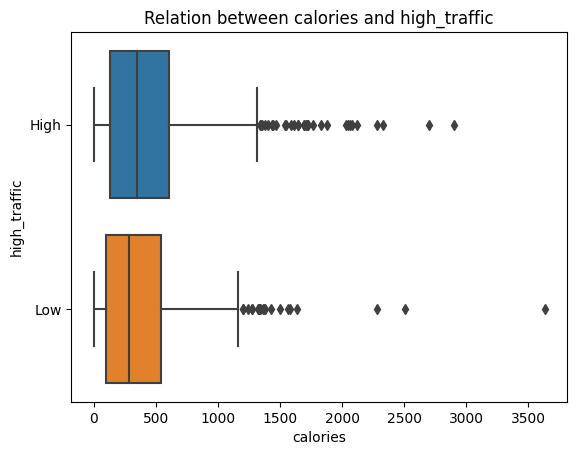

In [80]:
sns.boxplot(data=df, x='calories', y='high_traffic')
plt.title('Relation between calories and high_traffic')
plt.show()

In [81]:
calories_of_high, calories_of_low = df[df.high_traffic == 'High']['calories'], df[df.high_traffic == 'Low']['calories']
sub_means = calories_of_high.mean() - calories_of_low.mean()
print("Subtract mean of high-traffic calories & mean of low-traffic calories")
sub_means

Subtract mean of high-traffic calories & mean of low-traffic calories


65.37339744764267

### Is this difference a real difference or by chance?

**The Hypothesis:**
- Null Hypothesis (H0): mean for High <= mean for Low
- Alternative Hypothesis (H1): mean for High > mean for Low

**T-test**

In [82]:
threshold = 0.05
statistic, pvalue = st.ttest_ind(calories_of_high, calories_of_low, alternative='greater')
print("p-value",pvalue)
if pvalue >= threshold:# Fail to reject null hypothesis
    print("Not a real difference between calories of high-traffic and low-traffic")
else: # Reject null hypothesis
    print("Mean of Calories for high traffic > Mean of Calories for Low traffic")

p-value 0.012768589105788045
Mean of Calories for high traffic > Mean of Calories for Low traffic


**We can summarize that this difference is a real difference and the more calories the recipe, the more traffic**

# Model Development

**This is a classification problem**

Import Libraries

In [83]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Split data to 80% train data & 20% test data randomly (to build & evaluate Model)

**Tranformed Data for Models**

In [84]:
X = pd.get_dummies(df.drop('high_traffic', axis=1))
y = df['high_traffic'].replace({"High":1, "Low":0})
new_df = X.join(y)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=270)
new_df.head()

,calories,carbohydrate,sugar,protein,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6,high_traffic
recipe,,,,,,,,,,,,,,,,,,,,
1,435.939196,35.069676,9.046547,24.149296,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
2,35.480000,38.560000,0.660000,0.920000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,914.280000,42.680000,3.090000,2.880000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,97.030000,30.560000,38.630000,0.020000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,27.050000,1.850000,0.800000,0.530000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**The important features for high_traffic**

In [85]:
abs(new_df.corr()).sort_values(by='high_traffic', ascending=False)['high_traffic'][1:]*100

category_Beverages         37.043660
category_Vegetable         24.220810
category_Potato            22.079437
category_Breakfast         21.420406
category_Pork              19.828702
category_Chicken           14.375839
category_Chicken Breast     9.507895
category_Meat               8.688021
carbohydrate                7.895869
sugar                       7.368570
category_One Dish Meal      7.357260
calories                    7.256870
servings_6                  4.776356
protein                     4.348826
servings_2                  3.240768
category_Lunch/Snacks       2.262556
category_Dessert            2.057139
servings_1                  1.710431
servings_4                  0.002318
Name: high_traffic, dtype: float64

### Fitting a baseline model

In [86]:
param_grid = {
    'alpha': [0.1, 1],
    'fit_intercept':[True, False],
}

lr = GridSearchCV(estimator=RidgeClassifier(), param_grid=param_grid, cv=5)

l_mdl = make_pipeline(StandardScaler(), lr)

l_mdl.fit(x_train,y_train)
y_pred = l_mdl.predict(x_test)
scoring_linear_model = l_mdl.score(x_test,y_test)

print(lr.best_estimator_)

RidgeClassifier(alpha=0.1)


**Model evaluation**

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        76
           1       0.81      0.85      0.83       114

    accuracy                           0.79       190
   macro avg       0.78      0.77      0.78       190
weighted avg       0.79      0.79      0.79       190



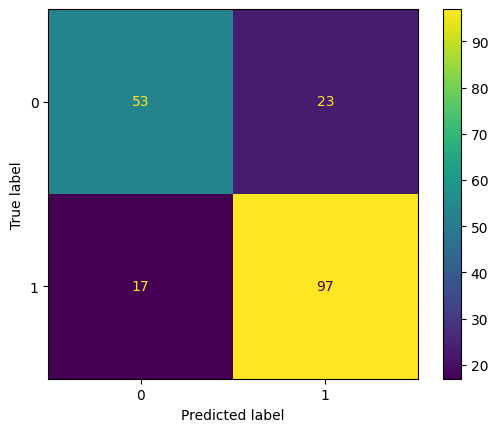

In [88]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Fitting a comparison model

In [89]:
param_grid = {
    'random_state':[42],
    'criterion': ['gini', 'entropy'],
    'max_depth':[20, 30],
    'min_samples_leaf':[7]
    
}

tree = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

t_mdl = make_pipeline(StandardScaler(), tree)

t_mdl.fit(x_train,y_train)
y_pred = t_mdl.predict(x_test)
scoring_tree_model = t_mdl.score(x_test,y_test)


print(tree.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=7,
                       random_state=42)


**Model evaluation**

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70        76
           1       0.79      0.86      0.82       114

    accuracy                           0.78       190
   macro avg       0.77      0.76      0.76       190
weighted avg       0.78      0.78      0.78       190



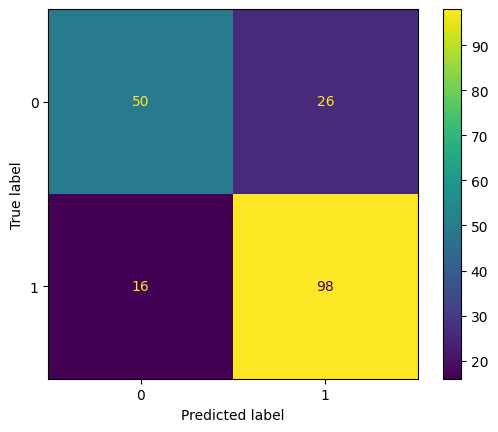

In [91]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**How the two models compare**

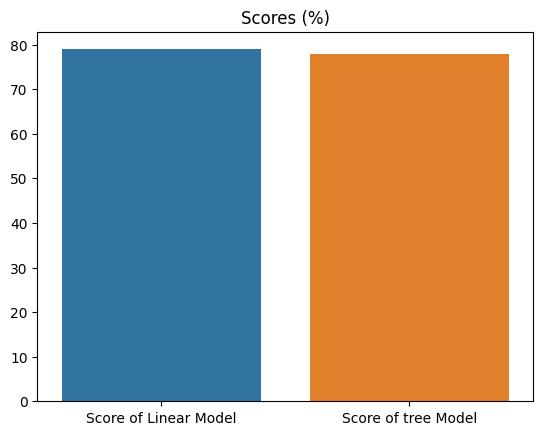

In [95]:
models = ['Score of Linear Model', 'Score of tree Model']
scores = [scoring_linear_model*100, scoring_tree_model*100]

sns.barplot(x=models, y=scores)
plt.title('Scores (%)')
plt.show()

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation